Tugas ini berupa Tugas Akhir yang diselesaikan pada Akhir Pekan 8. Tugas disusun sesuai dengan materi yang diberikan tiap harinya dari pekan 1-8.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset

silahkan unduh dataset berikut untuk mengerjakan Tugas Akhir:

[pelanggan_supermarket.csv](https://drive.google.com/uc?export=download&id=1jaxCbZ4fcCneeVCEN-yuxWE0RyX25tbQ)



---



---



---



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Google Earth/tugas_pks/pelanggan_supermarket (1).csv')
df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0




---



---



---



# Soal 1. Statistika Deskriptif

lakukan eksplorasi data dengan menggunakan statistika deskriptif. Gunakan pandas untuk mendapatkan summary statistics, dan analisa hasil yang ditampilkan.

In [5]:
#code here
df.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,245.000000,250.000000,246.000000
mean,125.500000,38.730612,64.736000,50.325203
std,72.312977,14.328726,25.112324,28.668121
min,1.000000,18.000000,15.000000,3.000000
25%,63.250000,29.000000,47.000000,26.250000
50%,125.500000,36.000000,70.000000,50.000000
75%,187.750000,48.000000,78.750000,74.750000
max,250.000000,120.000000,137.000000,150.000000


**Expected output**

![](https://drive.google.com/uc?id=1-5_d0Ey1lWMXj0d8ABimuPqqTz-h-8mx)

Give your analysis:

1.Umur pelanggan: Berdasarkan statistik tersebut, rata-rata umur pelanggan adalah 38.7 tahun, dengan standar deviasi sebesar 14.3 tahun. Anda juga dapat melihat nilai minimum (18 tahun) dan maksimum (120 tahun) dari data. Hal ini memberikan gambaran tentang distribusi umur pelanggan.

2.Pendapatan pertahun: Statistik menunjukkan rata-rata pendapatan tahunan pelanggan sebesar 64.7 juta, dengan standar deviasi sebesar 25.1 juta. Anda juga dapat melihat kisaran pendapatan antara 15 juta hingga 137 juta. Informasi ini dapat membantu Anda memahami pola pendapatan pelanggan dan seberapa bervariasi pendapatan mereka.

Skor Belanja: Statistik menunjukkan skor belanja pelanggan memiliki rata-rata sebesar 50.3 dengan standar deviasi sebesar 28.6. Rentang skor belanja adalah 1 hingga 100. Anda dapat melihat distribusi skor belanja pelanggan dan melihat seberapa aktif pelanggan dalam berbelanja.



---



---



---



# Soal 2. Handling missing value

Jika dilihat dari summary statistik terlihat dataset memiliki nilai missing. Hitunglah jumlah missing value menggunakan methode .isnull().

Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [6]:
#code here
missing_values = df.isnull().sum()
print("Jumlah missing value dalam setiap kolom:")
print(missing_values)


data_filled = df.fillna(method='ffill')


print("\nData setelah diisi dengan nilai sebelumnya:")
print(data_filled)

missing_values1 = data_filled.isnull().sum()
print("Jumlah missing value setelah diisi dalam setiap kolom:")
print(missing_values1)

Jumlah missing value dalam setiap kolom:
ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64

Data setelah diisi dengan nilai sebelumnya:
     ID_pelanggan Jenis Kelamin   Umur  Pendapatan pertahun (juta)  \
0               1     Laki-laki   19.0                          15   
1               2     Laki-laki   21.0                          15   
2               3     Perempuan   20.0                          16   
3               4     Perempuan   23.0                          16   
4               5     Perempuan   31.0                          17   
..            ...           ...    ...                         ...   
245           246     Laki-laki   59.0                          93   
246           247     Laki-laki   35.0                          93   
247           248     Perempuan   37.0                          97   
248           249     Perempuan   32.0   



---



---



---



# Soal 3. Handling outlier

1. Apakah data set memiliki nilai pencilan untuk setiap kolom? periksalah dengan melakukan visualisasi menggunakan boxplot.
2. Handling outlier tersebut dengan menggunakan teknik trimming / removing outliers (menggunakan teknik IQR)
3. simpan data hasil handling outlier ke dalam variabel df2
4. Teknik ini akan menghasilkan nilai missing pada nilai outlier yang telah dihapus, maka hapuslah data missing tersebut dengan menggunakan method .dropna()

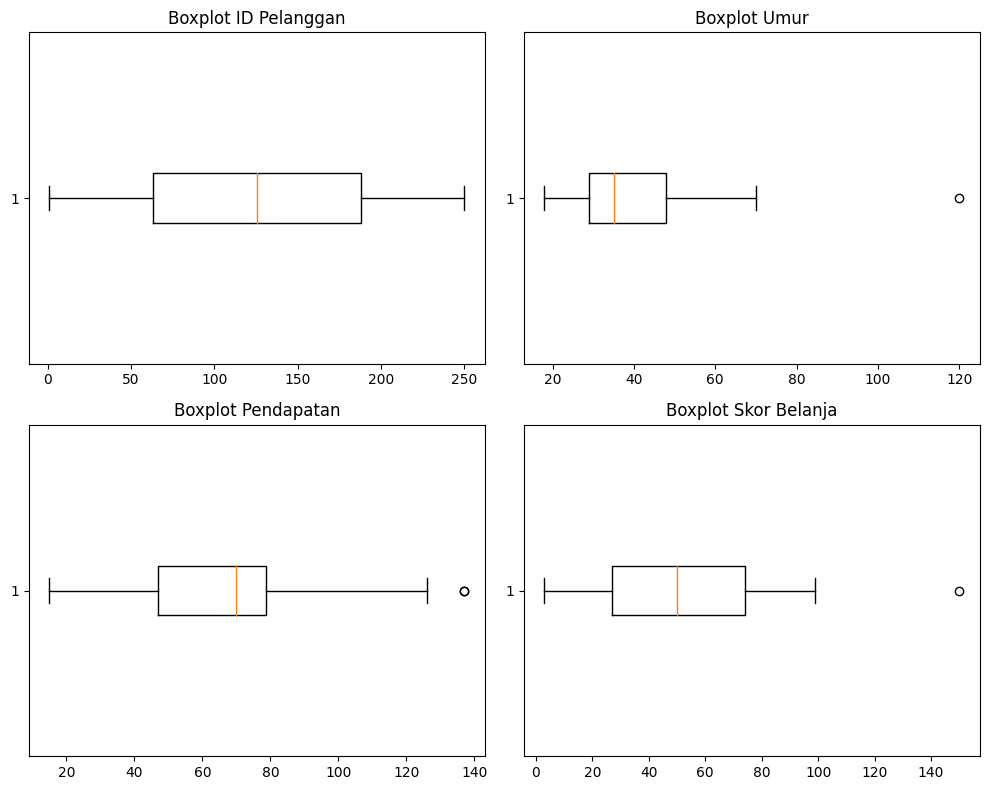

     ID_pelanggan Jenis Kelamin   Umur  Pendapatan pertahun (juta)  \
0               1     Laki-laki   19.0                          15   
1               2     Laki-laki   21.0                          15   
2               3     Perempuan   20.0                          16   
3               4     Perempuan   23.0                          16   
4               5     Perempuan   31.0                          17   
..            ...           ...    ...                         ...   
245           246     Laki-laki   59.0                          93   
246           247     Laki-laki   35.0                          93   
247           248     Perempuan   37.0                          97   
248           249     Perempuan   32.0                          97   
249           250     Laki-laki  120.0                          98   

     Skor Belanja (1-100)  
0                    39.0  
1                    81.0  
2                     6.0  
3                    77.0  
4                  

In [7]:
#code here
plt.figure(figsize=(10, 8))  # Menentukan ukuran plot

# Boxplot untuk kolom ID_pelanggan
plt.subplot(2, 2, 1)
plt.boxplot(data_filled['ID_pelanggan'], vert=False)
plt.title('Boxplot ID Pelanggan')
# Boxplot untuk kolom Umur
plt.subplot(2, 2, 2)
plt.boxplot(data_filled['Umur'], vert=False)
plt.title('Boxplot Umur')

# Boxplot untuk kolom Pendapatan pertahun (juta)
plt.subplot(2, 2, 3)
plt.boxplot(data_filled['Pendapatan pertahun (juta)'], vert=False)
plt.title('Boxplot Pendapatan')

# Boxplot untuk kolom Skor Belanja (1-100)
plt.subplot(2, 2, 4)
plt.boxplot(data_filled['Skor Belanja (1-100)'], vert=False)
plt.title('Boxplot Skor Belanja')

plt.tight_layout()  # Mengatur tata letak subplot yang rapi
plt.show()

# Menghitung nilai kuartil pertama (Q1) dan kuartil ketiga (Q3)
Q1 = data_filled['Skor Belanja (1-100)'].quantile(0.25)
Q3 = data_filled['Skor Belanja (1-100)'].quantile(0.75)

# Menghitung rentang IQR
IQR = Q3 - Q1

# Menghitung batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier dan menyimpan hasilnya ke dalam variabel df2
df2 = df[(data_filled['Skor Belanja (1-100)'] >= lower_bound) & (data_filled['Skor Belanja (1-100)'] <= upper_bound)]

# Menghapus data yang hilang (missing)
df2 = df2.dropna()

# Menampilkan data hasil handling outlier
print(df2)

**Expected output**

Melihat adanya pencilan menggunakan Boxplot

![](https://drive.google.com/uc?id=1ettD4G8xBMCYcMUVt88kn5k_yCufgdyf)



---



---



---



# Soal 4. statistika Inferential



*   Kita akan melakukan hipotesis terhadap 100 sample pengunjung Supermarket. Hipotesis awal adalah rata2 usia pengunjung supermarket di atas 35 tahun. Ujilah hipotesis tersebut dengan menggunakan teknik klasik (z-testing) dan probabilitas p-value)!
*   Gunakan variabel dataframe hasil handling missing value dan outlier di no soal sebelumnya
*   Untuk mempermudah perhitungan, ubahlah tipe data kolom Umur menjadi int dengan menggunakan methode .astype() baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html





In [8]:
df_100 = df2.sample(100,  random_state=1)

In [13]:
#code here for z-test
sample = df_100['Umur']
sample_mean = sample.mean()
sample_std = sample.std()
hypothesized_mean = 35
n = len(sample)
z_score = (sample_mean - hypothesized_mean) / (sample_std / np.sqrt(n))
print("Z-Score:", z_score)

Z-Score: 2.5570484815361967


In [14]:
#code here for p-value
from scipy import stats
# Menentukan ambang batas kritis (1 - α) menggunakan tabel distribusi normal standar
alpha = 0.05
critical_value = stats.norm.ppf(1 - alpha)

# Uji hipotesis
p_value = 1 - stats.norm.cdf(z_score)
print("Critical Value:", critical_value)
print("P-Value:", p_value)

if np.greater(z_score, critical_value):
    print("Hipotesis Nol ditolak. Rata-rata usia pengunjung supermarket > 35 tahun.")
else:
    print("Hipotesis Nol diterima. Tidak ada cukup bukti bahwa rata-rata usia pengunjung supermarket > 35 tahun.")

Critical Value: 1.6448536269514722
P-Value: 0.005278225182859808
Hipotesis Nol ditolak. Rata-rata usia pengunjung supermarket > 35 tahun.


Give your analysis:

Jika kita membuat hipotesis seperti ini:
Hipotesis Nol (H0): Rata-rata usia pengunjung supermarket <= 35 tahun
Hipotesis Alternatif (H1): Rata-rata usia pengunjung supermarket > 35 tahun. Maka dapat disimpulkan bahwa Hipotesis Nol ditolak. Rata-rata usia pengunjung supermarket > 35 tahun.

---



---



---



## Soal 5. EDA

Lakukan eksplorasi data analisis. Gunakan visualisasi distplot untuk melihat sebaran data dan histogram pada setiap kolom dataset awal sebelum dilakukan handling missing value maupun outlier

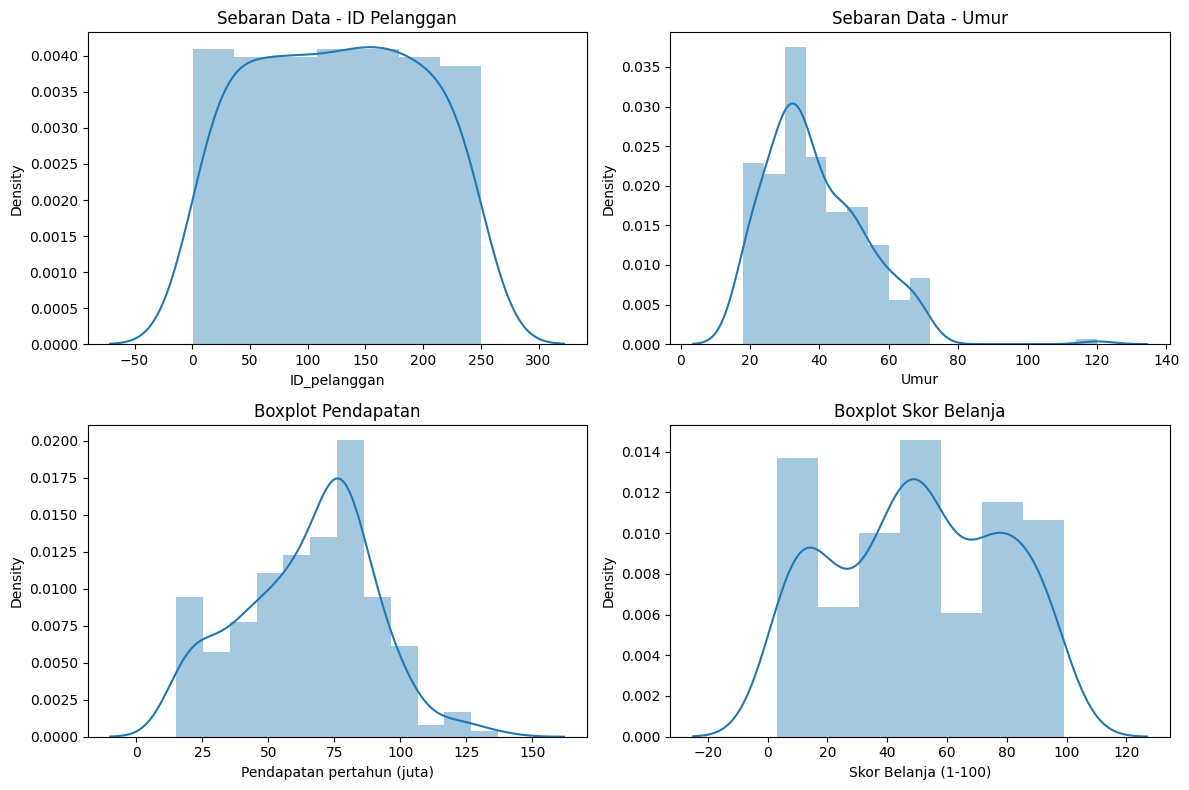

In [18]:
#code here for univariate
plt.figure(figsize=(12, 8))  # Menentukan ukuran plot

# Kolom ID_pelanggan
plt.subplot(2, 2, 1)
sns.distplot(df2['ID_pelanggan'])
plt.title('Sebaran Data - ID Pelanggan')

# Kolom Jenis Umur
plt.subplot(2, 2, 2)
sns.distplot(df2['Umur'])
plt.title('Sebaran Data - Umur')

# Kolom Pendapatan pertahun (juta)
plt.subplot(2, 2, 3)
sns.distplot(df2['Pendapatan pertahun (juta)'])
plt.title('Boxplot Pendapatan')

# Kolom Skor Belanja (1-100)
plt.subplot(2, 2, 4)
sns.distplot(df2['Skor Belanja (1-100)'])
plt.title('Boxplot Skor Belanja')


plt.tight_layout()  # Mengatur tata letak subplot yang rapi
plt.show()

Give your analysis:

Dengan melakukan visualisasi menggunakan distplot, kita dapat mendapatkan gambaran mengenai distribusi data pada setiap kolom dalam dataset. Hal ini membantu kita memahami sebaran data, melihat apakah terdapat nilai yang mencurigakan (outliers), serta mengetahui bentuk distribusi data tersebut. Jika kita lihat pada distplot terlihat terdapat outliers

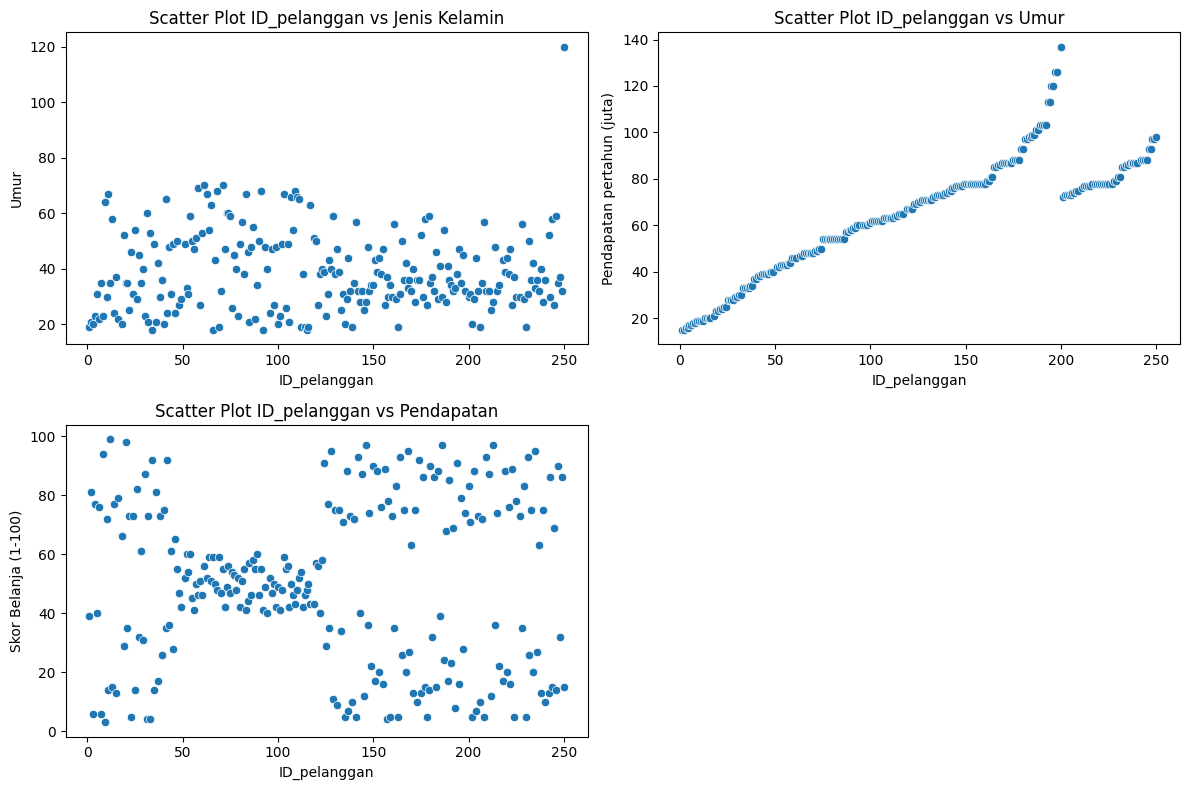

In [40]:
#code here for bivariate
# Scatter Plot
plt.figure(figsize=(12, 8))

# Kolom ID_pelanggan vs Jenis Umur
plt.subplot(2, 2, 1)
sns.scatterplot(data=df2, x='ID_pelanggan', y='Umur')
plt.title('Scatter Plot ID_pelanggan vs Jenis Kelamin')

# Kolom ID_pelanggan vs Pendapatan pertahun (juta)
plt.subplot(2, 2, 2)
sns.scatterplot(data=df2, x='ID_pelanggan', y='Pendapatan pertahun (juta)')
plt.title('Scatter Plot ID_pelanggan vs Umur')

# Kolom ID_pelanggan vs Skor Belanja (1-100)
plt.subplot(2, 2, 3)
sns.scatterplot(data=df2, x='ID_pelanggan', y='Skor Belanja (1-100)')
plt.title('Scatter Plot ID_pelanggan vs Pendapatan')


plt.tight_layout()
plt.show()

Give your analysis:

Bisa kita lihat bahwa besarnya nilai id_pelanggan berbanding lurus dengan pendapatan pertahun (juta), dan skor belanja pada range tengah diisi pula denga id_pelanggan pada range tengah

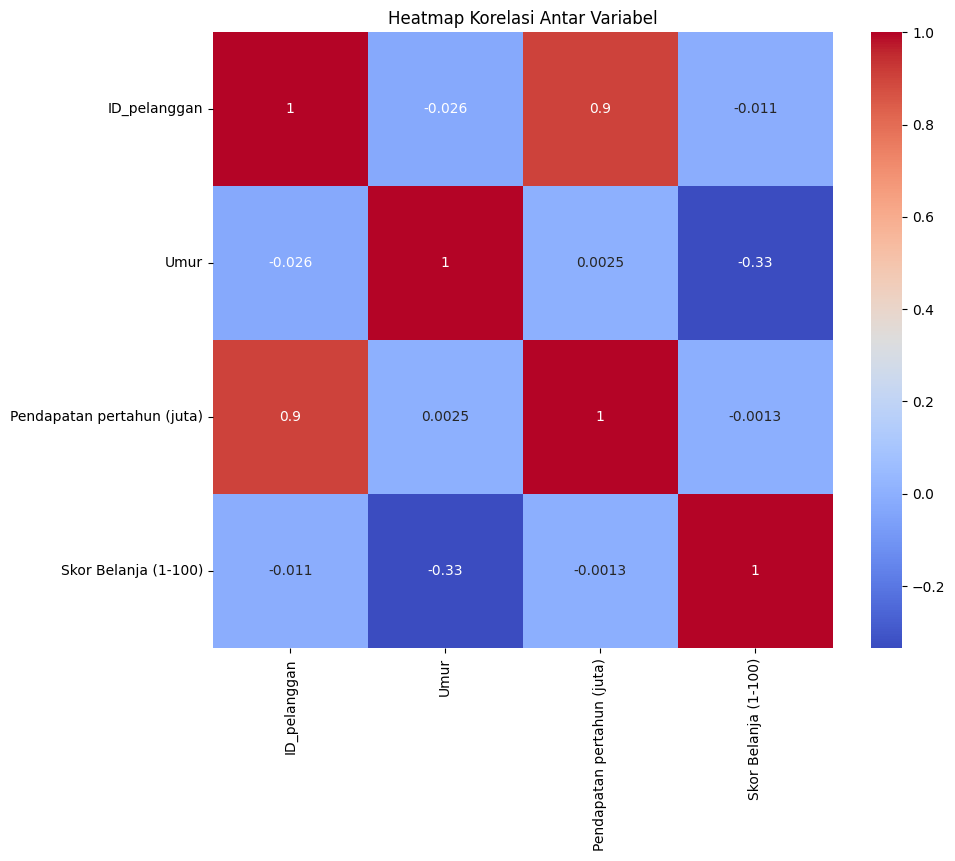

In [27]:
#code here for multivariate
# Menghitung matriks korelasi
corr_matrix = df2.corr()

# Mengatur ukuran plot
plt.figure(figsize=(10, 8))

# Membuat heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

Give your analysis:

Bisa kita lihat bahwa id_pelanggan berbanding lurus dengan pendapatan pertahun (juta) memliki korelasi tertinggi

**Expected output**

Univariate plot

![](https://drive.google.com/uc?id=12BSOah7WFzuOEJsKfsaNDw799zzqbDIs)

Bivariate plot

![](https://drive.google.com/file/d/1aNLD2M9a-d63sVkCqN7n475LQ8NqSsi1/)

Multivariate plot

![](https://drive.google.com/uc?id=1TTXm3BjoqqwSGMGE1en9ZIJT53Wm5SFf)



---

---



---





# Soal 6. Data scaling
lakukan scaling data dengan menggunakan standarisasi untuk kolom Umur dan skor belanja saja tetapi menggunakan variabel dataframe setelah handling missing value dan outlier

In [28]:
#code here
from sklearn.preprocessing import StandardScaler

# Membuat objek StandardScaler
scaler = StandardScaler()

# Mengambil kolom 'Umur' dan 'Skor Belanja' dari df2
data_to_scale = df2[['Umur', 'Skor Belanja (1-100)']]

# Melakukan standarisasi
scaled_data = scaler.fit_transform(data_to_scale)

# Membuat dataframe baru dengan data yang telah di-standarisasi
df_scaled = pd.DataFrame(scaled_data, columns=['Umur_scaled', 'Skor Belanja_scaled'])

# Menampilkan hasil standarisasi
print(df_scaled.head())


   Umur_scaled  Skor Belanja_scaled
0    -1.382176            -0.394335
1    -1.242884             1.119334
2    -1.312530            -1.583646
3    -1.103593             0.975175
4    -0.546428            -0.358295




---



---



---



# Soal 7. Clustering menggunakan k-menas

*   Lakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan
*   Gunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Gunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Hitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut

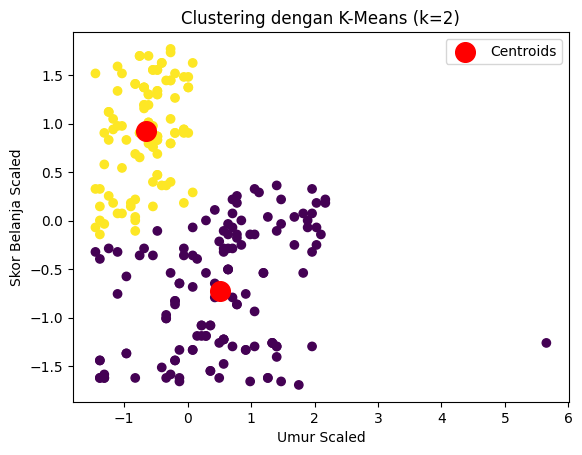

In [41]:
#code here
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Membuat objek KMeans dengan k=2
kmeans = KMeans(n_clusters=2, random_state=42)

# Melakukan clustering pada data yang telah di-standarisasi
clusters = kmeans.fit_predict(df_scaled)

# Menambahkan kolom 'Cluster' pada dataframe df_scaled
df_scaled['Cluster'] = clusters

# Mendapatkan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi hasil clustering
plt.scatter(df_scaled['Umur_scaled'], df_scaled['Skor Belanja_scaled'], c=df_scaled['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', color='red', s=200, label='Centroids')
plt.xlabel('Umur Scaled')
plt.ylabel('Skor Belanja Scaled')
plt.title('Clustering dengan K-Means (k=2)')
plt.legend()
plt.show()


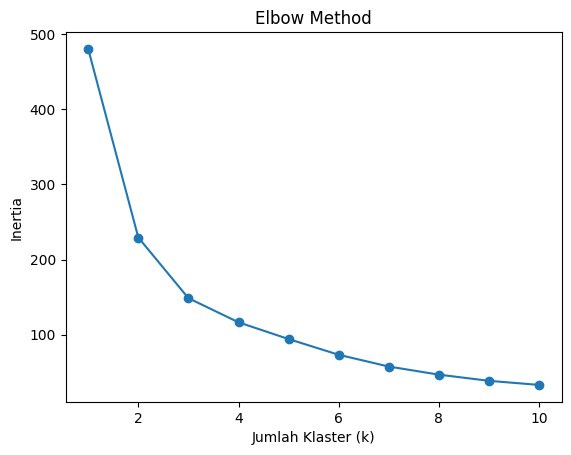

In [42]:
#code here
# List untuk menyimpan nilai inertia
inertia = []

# Mengiterasi melalui nilai k dari 1 hingga 10
for k in range(1, 11):
    # Membuat objek KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Melakukan clustering pada data yang telah di-standarisasi
    kmeans.fit(df_scaled[['Umur_scaled', 'Skor Belanja_scaled']])

    # Menyimpan inertia
    inertia.append(kmeans.inertia_)

# Plot hasil Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

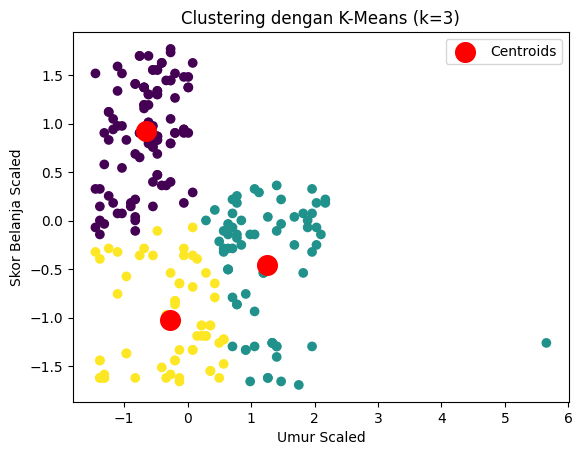

In [43]:
#code here
# Membuat objek KMeans dengan k=3
kmeans = KMeans(n_clusters=3, random_state=42)

# Melakukan clustering pada data yang telah di-standarisasi
cluster_3 = kmeans.fit_predict(df_scaled[['Umur_scaled', 'Skor Belanja_scaled']])

# Menambahkan kolom 'Cluster_3' pada dataframe df_scaled
df_scaled['Cluster_3'] = cluster_3

# Mendapatkan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi hasil clustering
plt.scatter(df_scaled['Umur_scaled'], df_scaled['Skor Belanja_scaled'], c=df_scaled['Cluster_3'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', color='red', s=200, label='Centroids')
plt.xlabel('Umur Scaled')
plt.ylabel('Skor Belanja Scaled')
plt.title('Clustering dengan K-Means (k=3)')
plt.legend()
plt.show()


**Expected output**

cluster 2

![](https://drive.google.com/uc?id=1L7nIskGXbeXGhKOzhMWCykJ4jY5538mn)

elbow method

![](https://drive.google.com/uc?id=1a3OL9FhiQ2-DyJQ8sg8PNzfS9QsszyvU)

cluster 3

![](https://drive.google.com/uc?id=1UR6vK36oLJinLPtechjJJBtxifmdFOSn)


In [44]:
#silhoutte score
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Coefficient untuk k=2
silhouette_coef_2 = silhouette_score(df_scaled[['Umur_scaled', 'Skor Belanja_scaled']], df_scaled['Cluster'])

# Menghitung Silhouette Coefficient untuk k=3
silhouette_coef_3 = silhouette_score(df_scaled[['Umur_scaled', 'Skor Belanja_scaled']], df_scaled['Cluster_3'])

print("Silhouette Coefficient k=2:", silhouette_coef_2)
print("Silhouette Coefficient k=3:", silhouette_coef_3)


Silhouette Coefficient k=2: 0.474609583009688
Silhouette Coefficient k=3: 0.467599492784479




---



---



---



# Soal 8. Analyze clustering result

Dari hasil klustering diatas, buatlah sebuah analisa segmentasi pelanggan untuk targetted market supermarket

Berdasarkan segmentasi di atas, kita dapat mengembangkan strategi pemasaran yang berbeda untuk masing-masing klaster pelanggan. Misalnya:

Klaster 0 (Pelanggan Potensial): Fokus pada program promosi dan diskon khusus, pengembangan produk baru yang dapat menarik minat mereka, dan peningkatan pelayanan pelanggan untuk mempertahankan pelanggan potensial ini.
Klaster 1 (Pelanggan Biasa): Upaya pemeliharaan pelanggan dan peningkatan retensi dapat menjadi fokus di sini. Misalnya, penawaran khusus untuk pelanggan setia, program loyalitas, dan kampanye peningkatan kepuasan pelanggan.